In [1]:
# importing relevant modules
# 20/03/2025
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

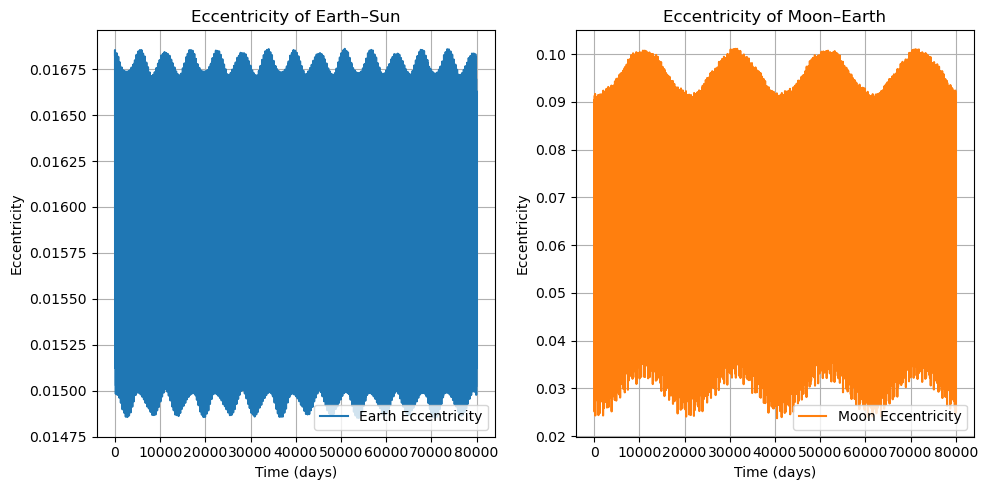

In [2]:
# Defining constants

G = 6.67430e-11               
M_sun  = 1.98847e30           
M_earth = 5.97219e24         
M_moon = 7.3477e22           

AU_to_m = 1.495978707e11      
day_to_sec = 86400.0         

# Converting positions and velocities to SI Units

pos_sun = np.array([0.00450250878464055477, 
                    0.00076707642709100705, 
                    0.00026605791776697764]) * AU_to_m

pos_earth = np.array([0.12051741410138465477, 
                      -0.92583847476914859295, 
                      -0.40154022645315222236]) * AU_to_m

pos_moon = (np.array([-0.00080817735147818490, 
                      -0.00199462998549701300, 
                      -0.00108726268307068900]) * AU_to_m 
            + pos_earth)

vel_sun = (np.array([-0.00000035174953607552, 
                     0.00000517762640983341, 
                     0.00000222910217891203])
           * (AU_to_m / day_to_sec))

vel_earth = (np.array([0.01681126830978379448, 
                       0.00174830923073434441, 
                       0.00075820289738312913]) 
             * (AU_to_m / day_to_sec))

vel_moon = ((np.array([0.00060108481561422370, 
                       -0.00016744546915764980, 
                       -0.00008556214140094871])
             * (AU_to_m / day_to_sec))
             + vel_earth)

# Converting into arrays
positions = np.array([pos_sun, pos_earth, pos_moon], dtype=float)
velocities = np.array([vel_sun, vel_earth, vel_moon], dtype=float)
masses = np.array([M_sun, M_earth, M_moon])

def acceleration(positions, masses):
    """
    Calculating the gravitational acceleration on each body
    
    Inputs:
    positions - array of positions of bodies
    masses - array of masses
    
    Output:
    acc - array of accelerations
    """
    # Number of bodies
    nbodies = positions.shape[0]
    acc = np.zeros_like(positions)

    for i in range(nbodies):
        # sum of accelerations due to each body
        for j in range(nbodies):
            if i != j:
                r_vec = positions[j] - positions[i]
                r_mag = np.linalg.norm(r_vec)
                acc[i] += G * masses[j] * r_vec / r_mag**3
    return acc

def velocity_verlet(positions, velocities, masses, dt):
    """
    Performs the velocity verlet update
    
    Inputs:
    positions - positons of bodies
    velocities - velocities of bodies
    masses - masses of bodies
    dt - timestep

    Outputs:
    positions_new = new positions of bodies
    velocities_new = new velocities of bodies
    """
    # Velocity Verlet Algorithm
    acc1 = acceleration(positions, masses)
    velocities_half = velocities + 0.5 * acc1 * dt
    positions_new = positions + velocities_half * dt
    acc2 = acceleration(positions_new, masses)
    velocities_new = velocities_half + 0.5 * acc2 * dt
    
    return positions_new, velocities_new

def runge_lenz_vector(r, v, M_total):
    """
    Computes the eccentricity vector

    Inputs:
    r - relative position
    v - relative velocity
    M_Total - total mass

    Ouput:
    e_vec - eccentricity vector
    """
    h = np.cross(r, v)
    rmag = np.linalg.norm(r)
    e_vec = (np.cross(v, h) / (G * M_total)) - (r / rmag)
    return e_vec


dt = 86400  # 1 day
num_days = 80000  # 80,000 days

# Arrays for storing data
time_array = np.zeros(num_days)
ecc_earth = np.zeros(num_days)
ex_earth = np.zeros(num_days)
ey_earth = np.zeros(num_days)
ez_earth = np.zeros(num_days)

ecc_moon = np.zeros(num_days)
ex_moon = np.zeros(num_days)
ey_moon = np.zeros(num_days)
ez_moon = np.zeros(num_days)

# Current state
pos = positions.copy()
vel = velocities.copy()

for i in range(num_days):
    t = i * dt
    time_array[i] = t / day_to_sec  # store in days
    
    # Update positions and velocities
    pos, vel = velocity_verlet(pos, vel, masses, dt)
    

    r_earth_sun = pos[1] - pos[0]
    v_earth_sun = vel[1] - vel[0]
    
    # Eccentricity for Earth
    e_vec_earth = runge_lenz_vector(r_earth_sun, v_earth_sun, M_sun + M_earth)
    ecc_earth[i] = np.linalg.norm(e_vec_earth)
    ex_earth[i]  = e_vec_earth[0]
    ey_earth[i]  = e_vec_earth[1]
    ez_earth[i]  = e_vec_earth[2]
    

    r_moon_earth = pos[2] - pos[1]
    v_moon_earth = vel[2] - vel[1]

    # Eccentricity for Moon
    e_vec_moon = runge_lenz_vector(r_moon_earth, v_moon_earth, M_earth + M_moon)
    ecc_moon[i] = np.linalg.norm(e_vec_moon)
    ex_moon[i]  = e_vec_moon[0]
    ey_moon[i]  = e_vec_moon[1]
    ez_moon[i]  = e_vec_moon[2]


# Plotting results
plt.figure(figsize=(10,5))

# Earth eccentricity
plt.subplot(1,2,1)
plt.plot(time_array, ecc_earth, label='Earth Eccentricity')
plt.xlabel('Time (days)')
plt.ylabel('Eccentricity')
plt.title('Eccentricity of Earth–Sun')
plt.legend()
plt.grid(True)

# Moon eccentricity
plt.subplot(1,2,2)
plt.plot(time_array, ecc_moon, label='Moon Eccentricity', color='C1')
plt.xlabel('Time (days)')
plt.ylabel('Eccentricity')
plt.title('Eccentricity of Moon–Earth')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig(fname='eccentricity plots')
plt.show()

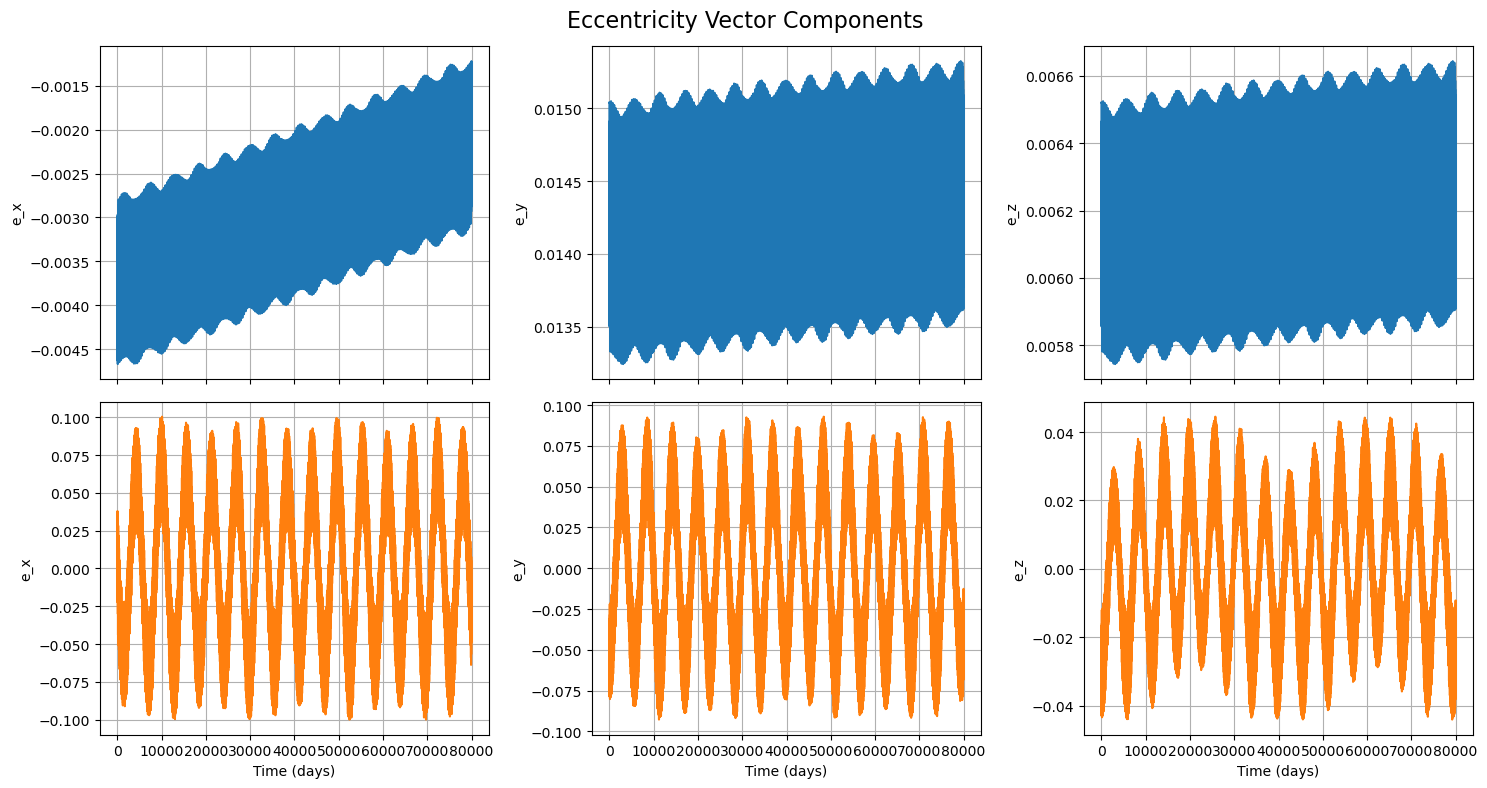

In [3]:
# Plottin eccentricity components
fig, axes = plt.subplots(2, 3, figsize=(15,8), sharex=True)

# Earth
axes[0,0].plot(time_array, ex_earth, label='e_x Earth')
axes[0,0].set_ylabel('e_x')
axes[0,0].grid(True)

axes[0,1].plot(time_array, ey_earth, label='e_y Earth')
axes[0,1].set_ylabel('e_y')
axes[0,1].grid(True)

axes[0,2].plot(time_array, ez_earth, label='e_z Earth')
axes[0,2].set_ylabel('e_z')
axes[0,2].grid(True)

# Moon
axes[1,0].plot(time_array, ex_moon, label='e_x Moon', color='C1')
axes[1,0].set_xlabel('Time (days)')
axes[1,0].set_ylabel('e_x')
axes[1,0].grid(True)

axes[1,1].plot(time_array, ey_moon, label='e_y Moon', color='C1')
axes[1,1].set_xlabel('Time (days)')
axes[1,1].set_ylabel('e_y')
axes[1,1].grid(True)

axes[1,2].plot(time_array, ez_moon, label='e_z Moon', color='C1')
axes[1,2].set_xlabel('Time (days)')
axes[1,2].set_ylabel('e_z')
axes[1,2].grid(True)

plt.suptitle('Eccentricity Vector Components', fontsize=16)
plt.tight_layout()
plt.savefig(fname='Component Eccentricity Plots')
plt.show()

In [4]:
def analyze_fft(time_days, signal, label='Signal'):
    """
    Runs the fast fourier transform to figure out the dominant frequencies and periods
    
    Inputs:
    time_days - number of days
    signal - data
    
    Returns:
      freqs_pos    - array of positive frequencies
      ampl_pos     - amplitude spectrum
      peak_freq    - frequency with max amplitude
      peak_period  - period in days
    """
    # removing offset
    signal_centered = signal - np.mean(signal)
    
    # computing fft
    fft_vals = np.fft.fft(signal_centered)
    
    # frequencies
    dt_days = time_days[1] - time_days[0]
    freqs = np.fft.fftfreq(len(signal_centered), d=dt_days)
    
    # amplitudes
    amplitude = np.abs(fft_vals)
    
    # keeping positive frequencies
    pos_mask = freqs > 0
    freqs_pos = freqs[pos_mask]
    ampl_pos  = amplitude[pos_mask]
    
    # identiying main peak
    peak_idx   = np.argmax(ampl_pos)
    peak_freq  = freqs_pos[peak_idx]      # cycles/day
    peak_period = 1.0 / peak_freq         # days
    
    print(f"--- {label} ---")
    print(f"  Peak frequency = {peak_freq:.5f} cycles/day")
    print(f"  Peak period    = {peak_period:.5f} days")
    print("")
    
    return freqs_pos, ampl_pos, peak_freq, peak_period



# For eccentricity magnitude
freq_ecc, ampl_ecc, peak_freq_ecc, period_ecc = analyze_fft(time_array, ecc_moon,
                                                            label='Moon: total ecc')

# For eccentricity components
freq_ex, ampl_ex, peak_freq_ex, period_ex = analyze_fft(time_array, ex_moon,
                                                        label='Moon: e_x')
freq_ey, ampl_ey, peak_freq_ey, period_ey = analyze_fft(time_array, ey_moon,
                                                        label='Moon: e_y')
freq_ez, ampl_ez, peak_freq_ez, period_ez = analyze_fft(time_array, ez_moon,
                                                        label='Moon: e_z')

--- Moon: total ecc ---
  Peak frequency = 0.03020 cycles/day
  Peak period    = 33.11258 days

--- Moon: e_x ---
  Peak frequency = 0.00017 cycles/day
  Peak period    = 5714.28571 days

--- Moon: e_y ---
  Peak frequency = 0.00017 cycles/day
  Peak period    = 5714.28571 days

--- Moon: e_z ---
  Peak frequency = 0.00017 cycles/day
  Peak period    = 5714.28571 days



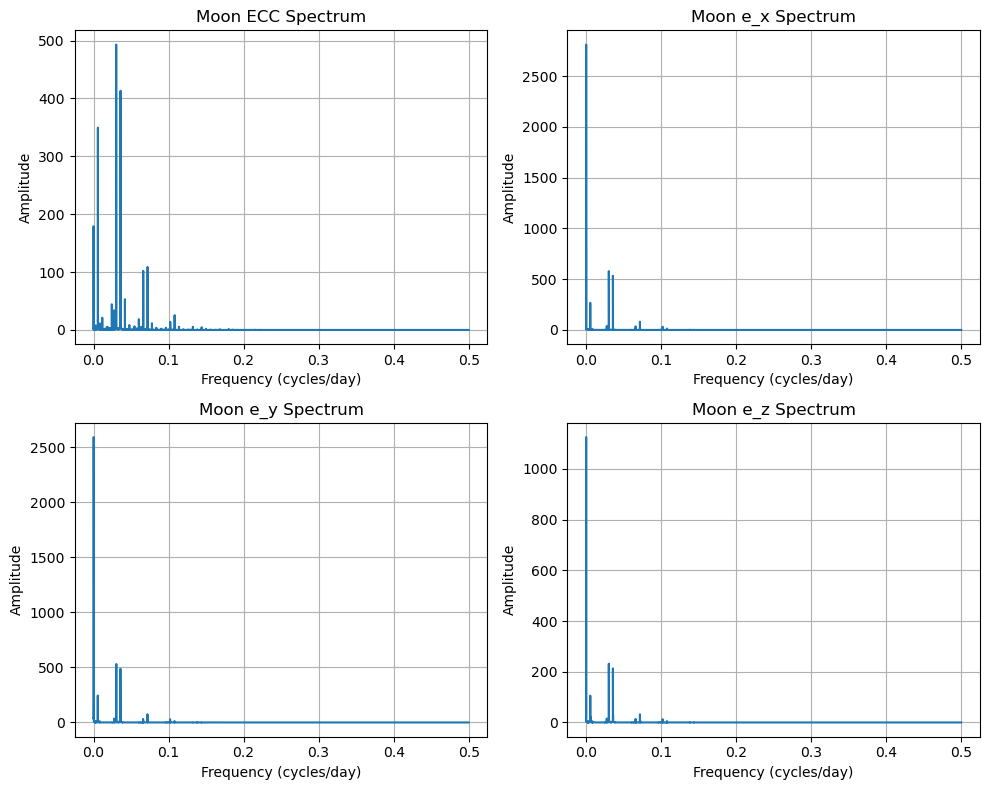

In [5]:
plt.figure(figsize=(10, 8))

# e magnitude
plt.subplot(2,2,1)
plt.plot(freq_ecc, ampl_ecc)
plt.xlabel('Frequency (cycles/day)')
plt.ylabel('Amplitude')
plt.title('Moon ECC Spectrum')
plt.grid(True)

# e_x
plt.subplot(2,2,2)
plt.plot(freq_ex, ampl_ex)
plt.xlabel('Frequency (cycles/day)')
plt.ylabel('Amplitude')
plt.title('Moon e_x Spectrum')
plt.grid(True)

# e_y
plt.subplot(2,2,3)
plt.plot(freq_ey, ampl_ey)
plt.xlabel('Frequency (cycles/day)')
plt.ylabel('Amplitude')
plt.title('Moon e_y Spectrum')
plt.grid(True)

# e_z
plt.subplot(2,2,4)
plt.plot(freq_ez, ampl_ez)
plt.xlabel('Frequency (cycles/day)')
plt.ylabel('Amplitude')
plt.title('Moon e_z Spectrum')
plt.grid(True)

plt.tight_layout()
plt.show()

In [6]:
# mean eccentricity
mean_ecc = np.mean(ecc_moon)
print(f'The mean value of the moons eccentricity is {mean_ecc}.')

The mean value of the moons eccentricity is 0.07398166715055723.


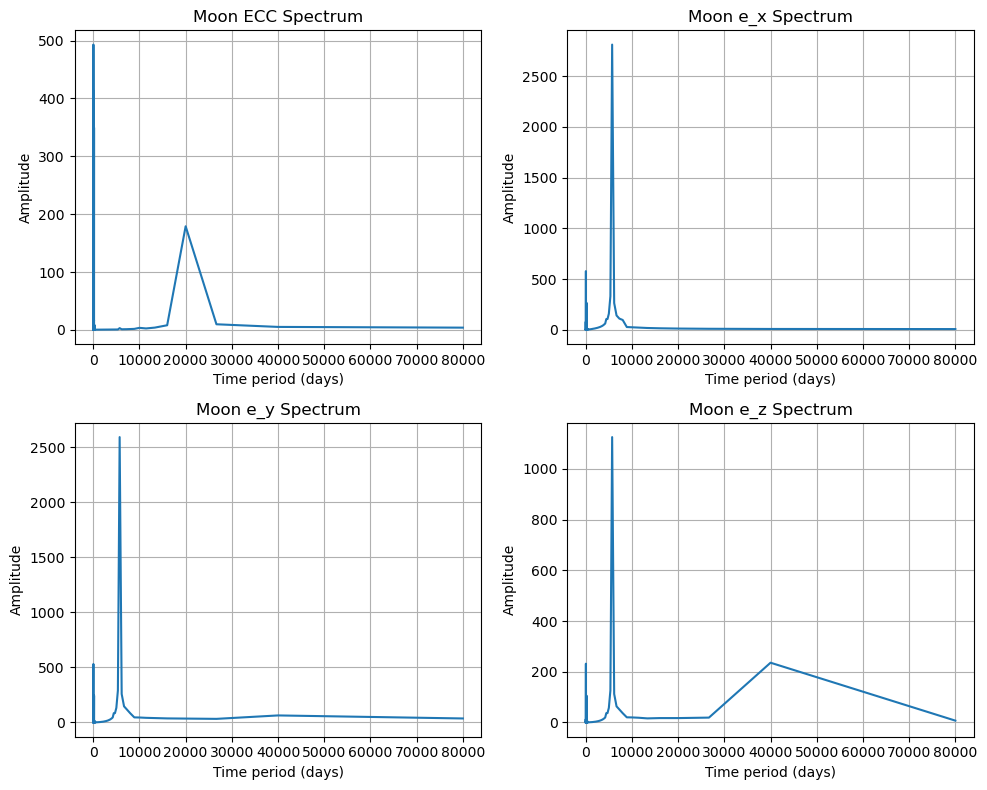

In [7]:
plt.figure(figsize=(10, 8))

# Plot for period

# (a) e magnitude
plt.subplot(2,2,1)
plt.plot(1/freq_ecc, ampl_ecc)
plt.xlabel('Time period (days)')
plt.ylabel('Amplitude')
plt.title('Moon ECC Spectrum')
plt.grid(True)

# (b) ex
plt.subplot(2,2,2)
plt.plot(1/freq_ex, ampl_ex)
plt.xlabel('Time period (days)')
plt.ylabel('Amplitude')
plt.title('Moon e_x Spectrum')
plt.grid(True)

# (c) ey
plt.subplot(2,2,3)
plt.plot(1/freq_ey, ampl_ey)
plt.xlabel('Time period (days)')
plt.ylabel('Amplitude')
plt.title('Moon e_y Spectrum')
plt.grid(True)

# (d) ez
plt.subplot(2,2,4)
plt.plot(1/freq_ez, ampl_ez)
plt.xlabel('Time period (days)')
plt.ylabel('Amplitude')
plt.title('Moon e_z Spectrum')
plt.grid(True)

plt.tight_layout()
plt.show()

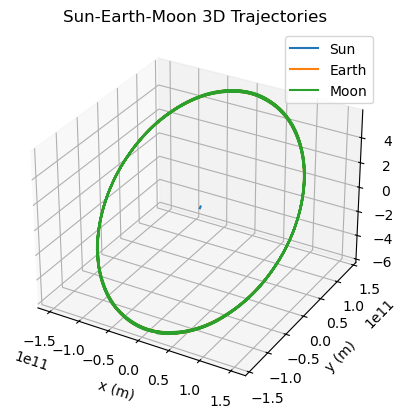

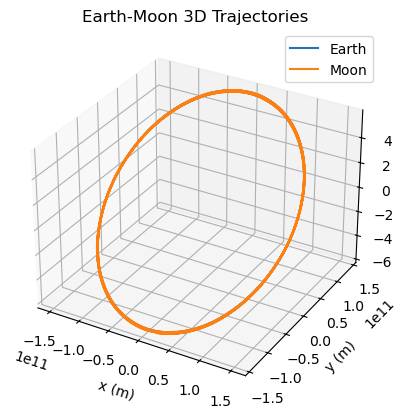

In [8]:
# data
positions = np.array([pos_sun, pos_earth, pos_moon], dtype=float)
velocities = np.array([vel_sun, vel_earth, vel_moon], dtype=float)
masses = np.array([M_sun, M_earth, M_moon])

# time conditions
dt = day_to_sec / 4.0     
num_days = 10000         
num_steps = num_days      

# storing the state
pos_array = np.zeros((num_steps, 3, 3))  

# Initialising
pos = 1.0 * positions
vel = 1.0 * velocities

# integrating to store the positions
for i in range(num_steps):
    pos, vel = velocity_verlet(pos, vel, masses, dt)
    pos_array[i] = pos

# parsing the data
sun_xyz    = pos_array[:, 0, :]
earth_xyz  = pos_array[:, 1, :]
moon_xyz   = pos_array[:, 2, :]

# Sun-Earth-Moon plot
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')

ax1.plot(sun_xyz[:,0],   sun_xyz[:,1],   sun_xyz[:,2],   label='Sun')
ax1.plot(earth_xyz[:,0], earth_xyz[:,1], earth_xyz[:,2], label='Earth')
ax1.plot(moon_xyz[:,0],  moon_xyz[:,1],  moon_xyz[:,2],  label='Moon')

ax1.set_title("Sun-Earth-Moon 3D Trajectories")
ax1.set_xlabel("x (m)")
ax1.set_ylabel("y (m)")
ax1.set_zlabel("z (m)")
ax1.legend()
plt.savefig(fname='3D Sun-Earth-Moon')
plt.show()

#Earth-Moon relative plot
fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')

ax2.plot(earth_xyz[:,0], earth_xyz[:,1], earth_xyz[:,2], label='Earth')
ax2.plot(moon_xyz[:,0],  moon_xyz[:,1],  moon_xyz[:,2],  label='Moon')

ax2.set_title("Earth-Moon 3D Trajectories")
ax2.set_xlabel("x (m)")
ax2.set_ylabel("y (m)")
ax2.set_zlabel("z (m)")
ax2.legend()
plt.savefig(fname='3D Earth-Moon')
plt.show()

I had trouble doing the fourier transform as it always brought errors and wrong values, however, after altering the code after reading session 9 notes. I reduced the time step and increased the propagation period until i could find trends.